In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
#Loading Data
weatherstation = pd.read_json("lab5-EDA-GIS/EDA/weatherstation.json")
weatherstation.tail(5)

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
26170,2018-11-30 22:40:00,0.0,92.8,0.0,0.0,1020.8,-0.7
26171,2018-11-30 22:45:00,0.0,NaN,NaN,NaN,NaN,NaN
26172,2018-11-30 22:50:00,0.0,93.0,0.0,0.0,1020.9,-0.7
26173,2018-11-30 22:55:00,0.0,NaN,NaN,NaN,NaN,NaN
26174,2018-11-30 23:00:00,0.0,92.4,0.0,0.0,1021.0,-0.7


In [31]:
#Load Sep, Oct, Nov Datasets
wind_data_nov = pd.read_csv("lab5-EDA-GIS/EDA/wind_data_nov.csv")
wind_data_oct = pd.read_csv("lab5-EDA-GIS/EDA/wind_data_oct.csv")
wind_data_sep = pd.read_csv("lab5-EDA-GIS/EDA/wind_data_sep.csv")

#combine wind data into one dataframe
res = [wind_data_sep, wind_data_oct, wind_data_nov]
wind_data = pd.concat(res)
wind_data.head(5)

,timestamp,wind_speed,wind_direction
0,2018-09-01 00:00:00,4.443333,68.685333
1,2018-09-01 00:15:00,4.122467,71.740667
2,2018-09-01 00:30:00,3.427533,67.434667
3,2018-09-01 00:45:00,3.437867,68.142667
4,2018-09-01 01:00:00,3.688533,69.695333


In [32]:
#check data dimensions of weatherstation ie. No. of rows and columns
print("Weather Station data has {0} rows and {1} columns".format(weatherstation.shape[0], weatherstation.shape[1]))
print("----------------------------------------------")
#check data dimensions of wind data ie. No. of rows and columns
print("Wind data has {0} rows and {1} columns".format(wind_data.shape[0], wind_data.shape[1]))
print("----------------------------------------------")

Weather Station data has 26175 rows and 7 columns
----------------------------------------------
Wind data has 8736 rows and 3 columns
----------------------------------------------


In [5]:
#check weather data columns data type
weatherstation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      26175 non-null  datetime64[ns]
 1   precipitation  26162 non-null  float64       
 2   humidity       13085 non-null  float64       
 3   radiation      13085 non-null  float64       
 4   sunshine       13083 non-null  float64       
 5   pressure       13085 non-null  float64       
 6   temperature    13059 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [33]:
#Count the number of missing alues for each column
weatherstation.isnull().sum()

timestamp            0
precipitation       13
humidity         13090
radiation        13090
sunshine         13092
pressure         13090
temperature      13116
dtype: int64

In [34]:
#Count the number of missing alues for each column
wind_data.isnull().sum()

timestamp           0
wind_speed        192
wind_direction    192
dtype: int64

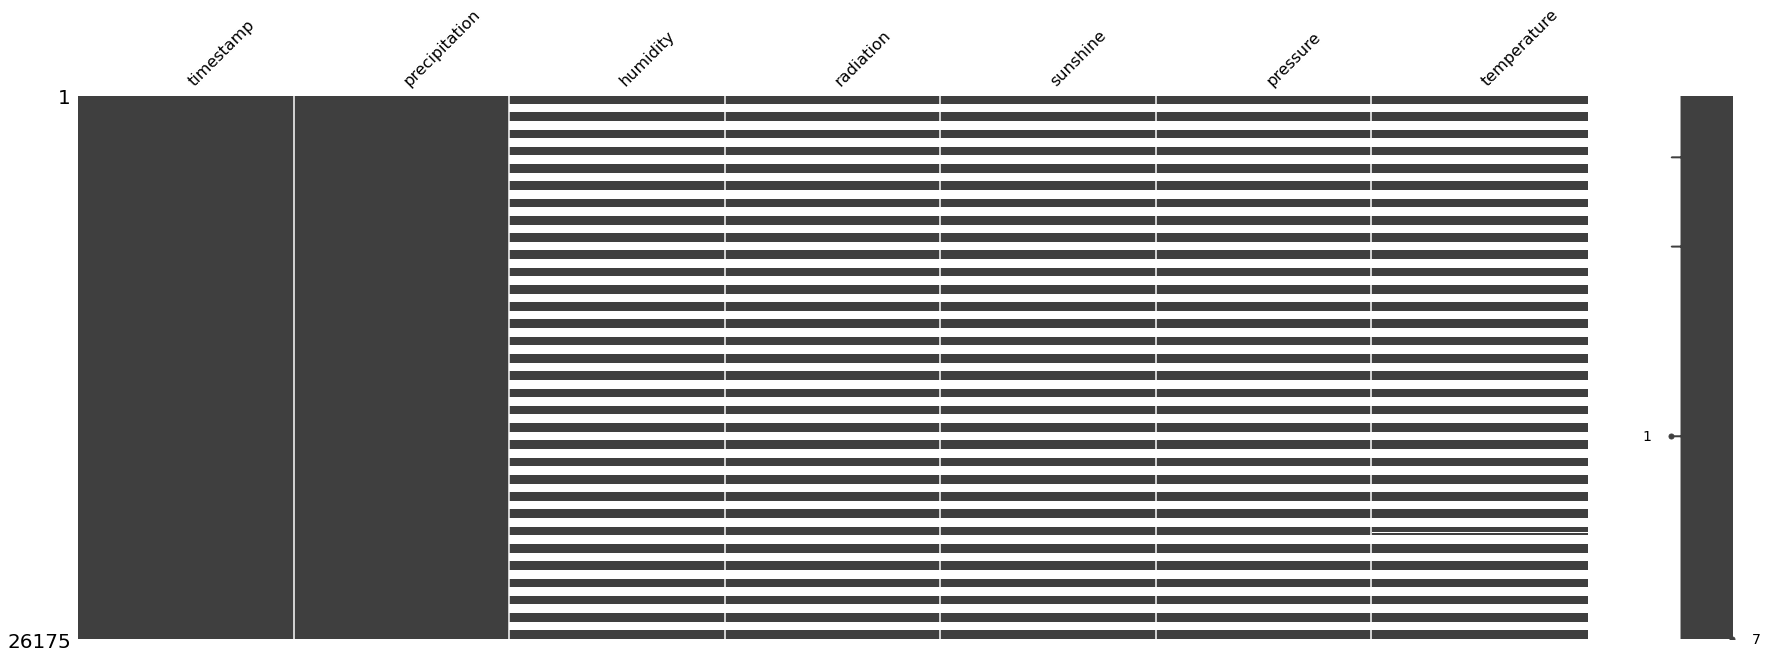

In [8]:
import missingno as msno
msno.matrix(weatherstation, figsize = (30,10))

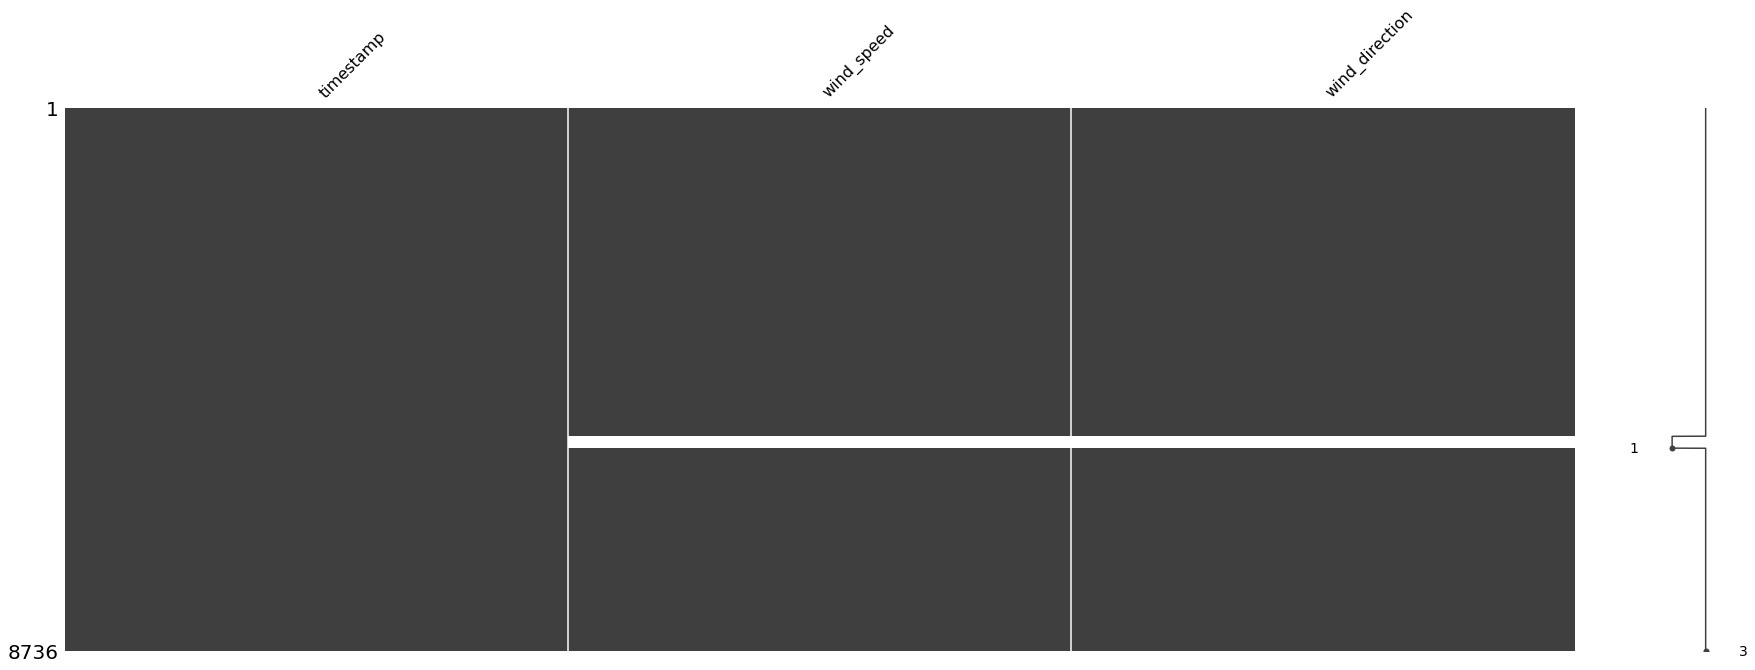

In [9]:
msno.matrix(wind_data, figsize = (30,10))

In [51]:
#Cleaning Data
#Make copy of data
weather = weatherstation.copy()
wind = wind_data.copy()

In [53]:
#Removing NA fields
weather = weather.dropna()
#Reset Index
#weather = weather.reset_index(drop = true)
wind = wind.dropna()

In [54]:
weather.head(10)

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
2,2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
4,2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1
6,2018-09-01 00:30:00,0.0,95.1,0.0,600.0,1016.4,16.1
8,2018-09-01 00:40:00,0.0,95.3,0.0,600.0,1016.3,16.1
10,2018-09-01 00:50:00,0.0,95.0,0.0,598.5,1016.1,16.0
12,2018-09-01 01:00:00,0.0,94.8,0.0,599.0,1016.0,16.0
14,2018-09-01 01:10:00,0.0,95.0,0.0,600.0,1016.1,15.9
16,2018-09-01 01:20:00,0.0,94.9,0.0,600.0,1015.9,15.8
18,2018-09-01 01:30:00,0.0,93.5,0.0,600.0,1015.7,15.7


In [55]:
#Sampling for weather is done after every 10 minutes 
#check for statistical analysis of Numerical variables
weather.describe()

,precipitation,humidity,radiation,sunshine,pressure,temperature
count,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000,13053.000000
mean,0.008282,73.747414,118.979599,187.806328,1019.172267,14.066988
std,0.060018,20.233246,201.247685,274.098417,6.708689,6.612585
min,0.000000,8.900000,0.000000,0.000000,989.500000,-1.800000
25%,0.000000,57.500000,0.000000,0.000000,1016.000000,9.800000
50%,0.000000,78.800000,0.000000,0.000000,1019.700000,13.400000
75%,0.000000,91.300000,162.100000,598.900000,1023.300000,18.900000
max,2.700000,100.100000,928.000000,600.000000,1039.800000,30.400000


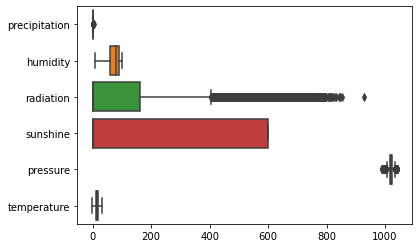

In [56]:
weather_df = weather[['precipitation', 'humidity', 'radiation', 'sunshine', 'pressure', 'temperature']]

ax = sns.boxplot(data = weather_df, orient = "h")

Text(0.5, 0, 'Precipitation')

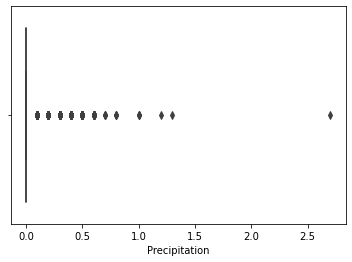

In [57]:
#Check Precipitation
ax = sns.boxplot(x=weather["precipitation"])
ax.set_xlabel("Precipitation")

Text(0.5, 0, 'Radiation')

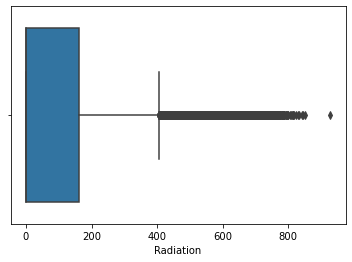

In [58]:
#Check Radiation
ax = sns.boxplot(x=weather["radiation"])
ax.set_xlabel("Radiation")

Text(0.5, 0, 'Pressure')

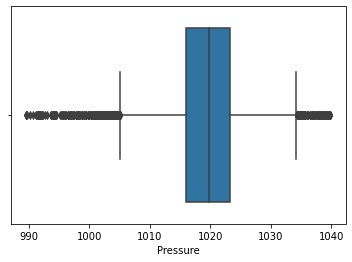

In [59]:
ax = sns.boxplot(x=weather["pressure"])
ax.set_xlabel("Pressure")

Text(0.5, 0, 'Temparature')

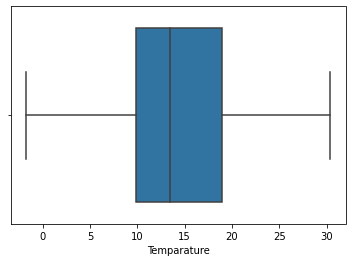

In [60]:
ax = sns.boxplot(x=weather["temperature"])
ax.set_xlabel("Temparature")

In [61]:
#Wind Data
wind.describe()

,wind_speed,wind_direction
count,8544.000000,8544.000000
mean,4.327420,200.067624
std,2.447600,89.479939
min,0.081000,20.225667
25%,2.522467,111.660333
50%,3.887700,229.986667
75%,5.665633,279.253333
max,15.777333,343.893333


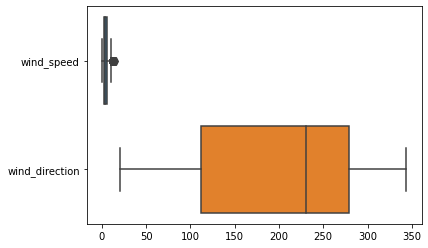

In [62]:
wind_df = wind[['wind_speed', 'wind_direction']]

ax = sns.boxplot(data = wind_df, orient = "h")

Text(0.5, 0, 'Wind Speed')

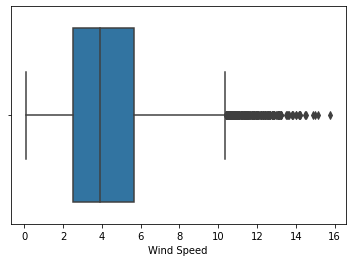

In [63]:
ax = sns.boxplot(x=wind["wind_speed"])
ax.set_xlabel("Wind Speed")

Text(0.5, 0, 'Wind Direction')

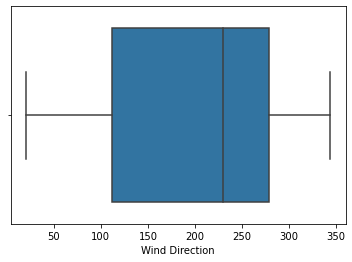

In [64]:
ax = sns.boxplot(x=wind["wind_direction"])
ax.set_xlabel("Wind Direction")

In [83]:
#Combine Wind and weather Data
wind['timestamp'] = pd.to_datetime(wind.timestamp) # Converting wind timestamp to datetime

inner_merged = pd.merge(weather, wind, on="timestamp")

inner_merged.head()

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature,wind_speed,wind_direction
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1,4.443333,68.685333
1,2018-09-01 00:30:00,0.0,95.1,0.0,600.0,1016.4,16.1,3.427533,67.434667
2,2018-09-01 01:00:00,0.0,94.8,0.0,599.0,1016.0,16.0,3.688533,69.695333
3,2018-09-01 01:30:00,0.0,93.5,0.0,600.0,1015.7,15.7,3.603533,68.634667
4,2018-09-01 02:00:00,0.0,94.5,0.0,600.0,1015.9,15.7,3.239133,56.515333


In [84]:
#check data dimensions of wind data ie. No. of rows and columns
print("Merged data has {0} rows and {1} columns".format(inner_merged.shape[0], inner_merged.shape[1]))
print("----------------------------------------------")

Merged data has 4254 rows and 9 columns
----------------------------------------------


In [86]:
#EDA
inner_merged.describe() # Getting Statistical Meams for the dataframe

,precipitation,humidity,radiation,sunshine,pressure,temperature,wind_speed,wind_direction
count,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000
mean,0.007734,73.604419,120.822261,191.587306,1019.431993,14.078326,4.330021,200.072013
std,0.068773,20.300861,202.637541,275.756581,6.516052,6.681223,2.449578,89.465862
min,0.000000,9.100000,0.000000,0.000000,989.500000,-1.800000,0.085533,20.225667
25%,0.000000,57.200000,0.000000,0.000000,1016.300000,9.600000,2.513950,111.325833
50%,0.000000,78.700000,0.000000,0.000000,1019.800000,13.500000,3.868233,228.916667
75%,0.000000,91.100000,170.400000,598.900000,1023.300000,19.000000,5.670367,279.473333
max,2.700000,100.100000,928.000000,600.000000,1039.700000,30.400000,14.504667,343.893333


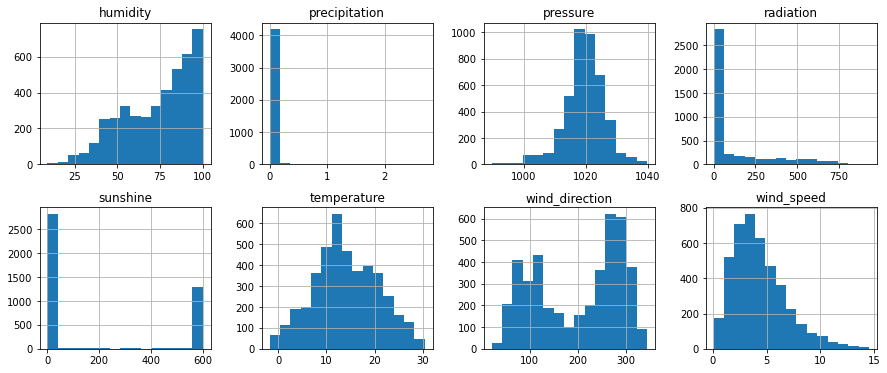

In [87]:
#Analyzing Numerical Variables
numerical = [ 'precipitation', 'humidity','radiation', 'sunshine', 'pressure', 'temperature','wind_speed', 'wind_direction']

inner_merged[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));


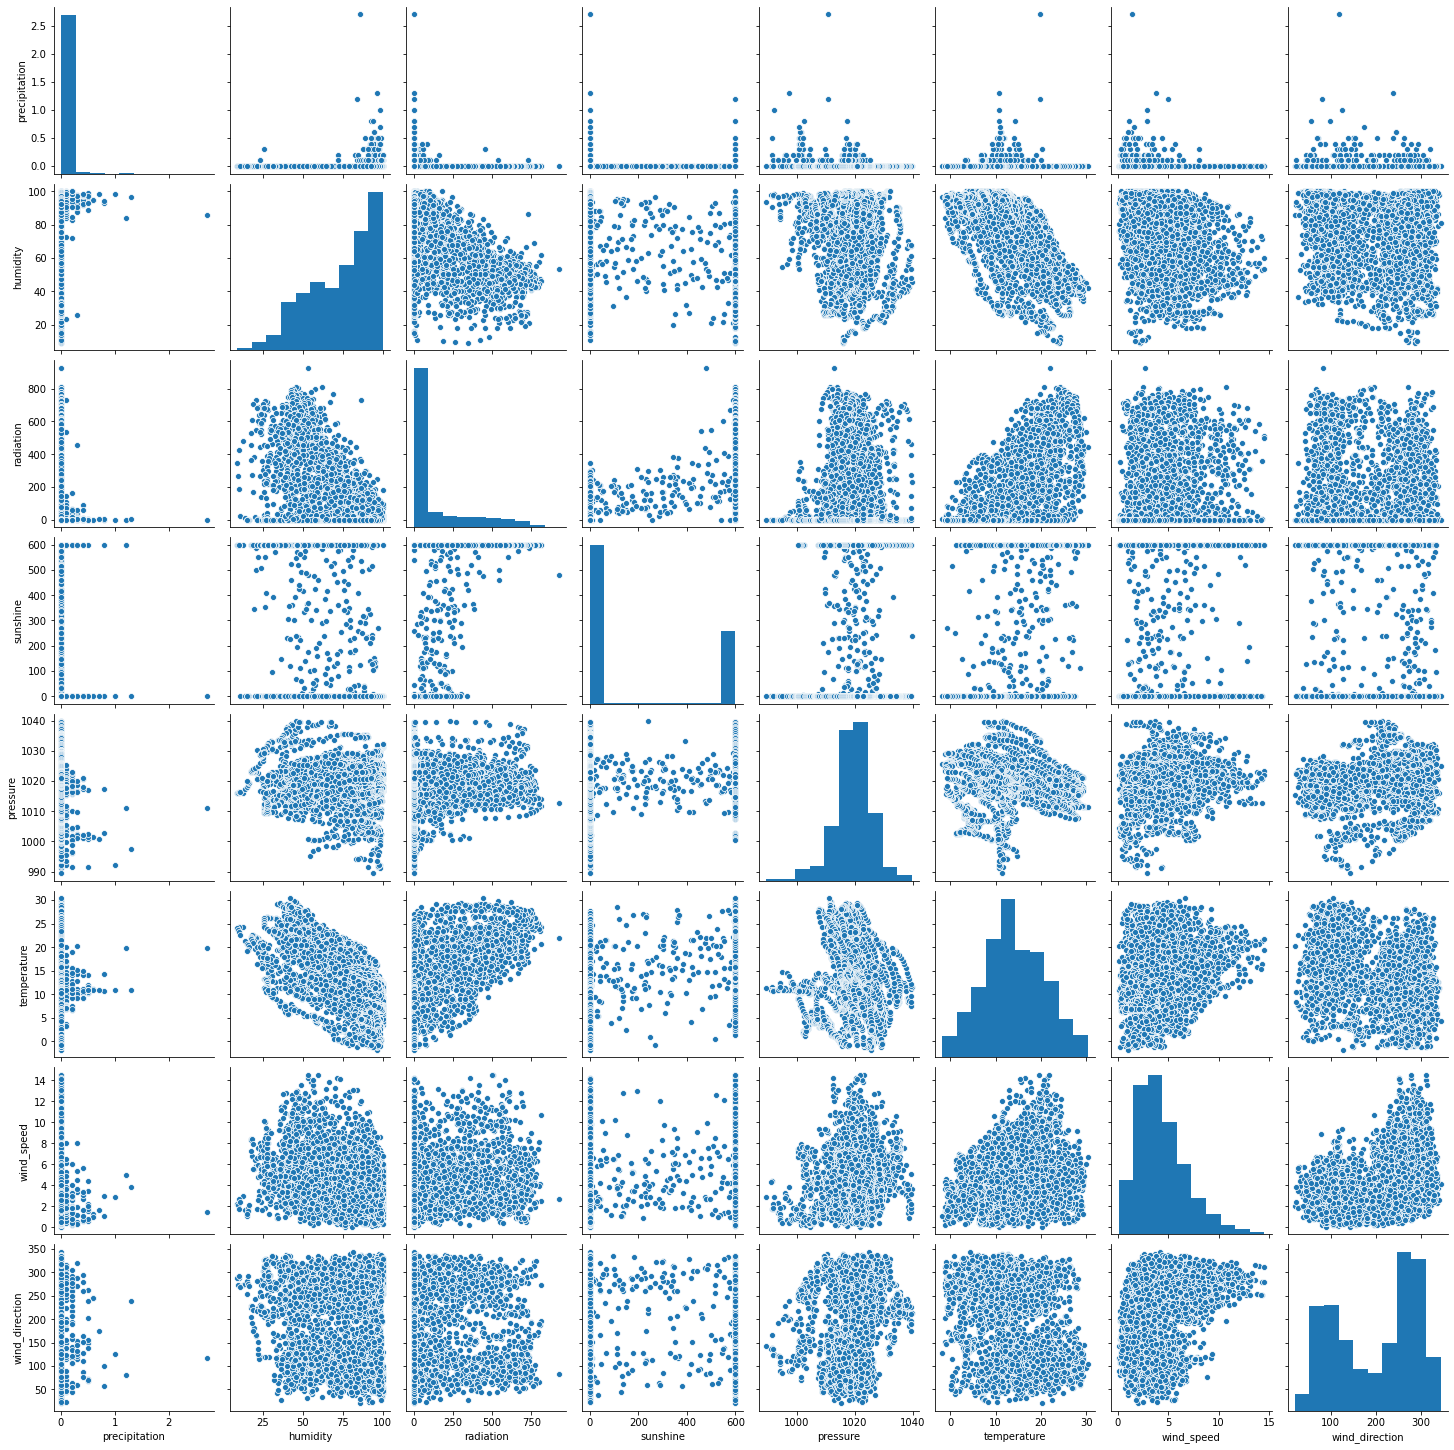

In [90]:
sns.pairplot(inner_merged[numerical]);

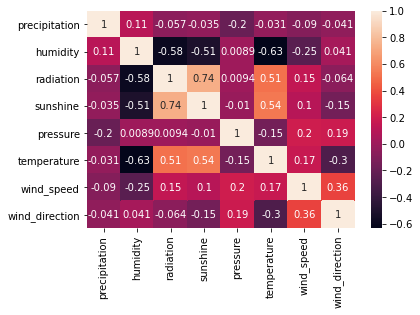

In [92]:
sns.heatmap(inner_merged[numerical].corr(), annot = True)